# 01 Data Pre-processing
author: SheltonXiao (Tong Xiao)    
2023/2/13

In [1]:
import os
import numpy as np
import pandas as pd
from tqdm import trange
from IPython.display import clear_output
import matplotlib.pyplot as plt

## import data
prepared by `00-data-preparation.ipynb`

### Earthquake Data

In [2]:
eq_data_raw = pd.read_csv(os.path.join(r"data/processed","earthquake.csv"),parse_dates=True)
eq_data = pd.read_csv(os.path.join(r"data/processed","eqdata.csv"),parse_dates=["Time"])


In [23]:
eq_data_raw.tail()

,#YYY/MM/DD,HH:mm:SS.ss,ET,GT,MAG,M,LAT,LON,DEPTH,Q,EVID,NPH,NGRM,Time,Year
857823,2023/02/08,05:21:02.10,eq,l,0.70,l,33.568,-116.858,1.7,A,40412144.0,10.0,1108.0,2023-02-08 05:21:02.100,2023
857824,2023/02/08,05:44:39.68,eq,l,0.87,l,33.647,-116.790,20.5,B,40412152.0,16.0,1371.0,2023-02-08 05:44:39.680,2023
857825,2023/02/08,06:08:52.83,eq,l,0.62,l,35.698,-117.563,6.1,B,40412160.0,12.0,683.0,2023-02-08 06:08:52.830,2023
857826,2023/02/08,07:21:47.62,eq,l,1.28,l,34.060,-118.948,2.6,B,40412168.0,19.0,1679.0,2023-02-08 07:21:47.620,2023
857827,2023/02/08,08:06:31.35,eq,l,0.42,l,33.578,-116.716,2.2,A,40412176.0,12.0,1220.0,2023-02-08 08:06:31.350,2023


In [4]:
eq_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29234 entries, 0 to 29233
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   FID       29234 non-null  int64         
 1   ET        29234 non-null  object        
 2   GT        29234 non-null  object        
 3   MAG       29234 non-null  float64       
 4   M         29234 non-null  object        
 5   LAT       29234 non-null  float64       
 6   LON       29234 non-null  float64       
 7   DEPTH     29234 non-null  float64       
 8   Q         29234 non-null  object        
 9   EVID      29234 non-null  int64         
 10  NPH       29234 non-null  int64         
 11  NGRM      29234 non-null  int64         
 12  Time      29097 non-null  datetime64[ns]
 13  Year      29234 non-null  int64         
 14  ORIG_FID  29234 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(6), object(4)
memory usage: 3.3+ MB


### Well information and time series

well infomation

In [5]:
well_info = pd.read_csv(os.path.join(r"data/processed","well_injection_info.csv"),index_col = 0,parse_dates=False)

In [32]:
well_info.tail()

,Operator Name,County Name,Field Name,Lease Name,Well #,Area Name,Area Code,District #,Section,Township,Range,Base Meridian,Latitude,Longitude
API #,,,,,,,,,,,,,,
27300035,Mobil Oil Corporation,San Diego Offshore,Any Field,NaN,S.C. 1 C,Any Area,0,1,24,10S,07W,SB,33.292263,-117.568644
27320001,"SWEPI, LP",San Diego Offshore,Any Field,Point Loma Core Hole,1,Any Area,0,1,28,17S,04W,SB,32.659824,-117.302973
27320002,"SWEPI, LP",San Diego Offshore,Any Field,Oceanside Core Hole,1,Any Area,0,1,31,11S,05W,SB,33.184411,-117.436527
27320003,"SWEPI, LP",San Diego Offshore,Any Field,Encinitas Core Hole,1,Any Area,0,1,12,13S,05W,SB,0.000000,0.000000
27320004,"SWEPI, LP",San Diego Offshore,Any Field,La Jolla Core Hole,1,Any Area,0,1,24,15S,05W,SB,0.000000,0.000000


injection data

In [6]:
injection = pd.read_csv(os.path.join(r"data/processed","well_injection_data_nonzero.csv"),parse_dates=["Reported Date"])

C:\Users\Intel\AppData\Local\Temp\ipykernel_18436\3406319341.py:1: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  injection = pd.read_csv(os.path.join(r"data/processed","well_injection_data_nonzero.csv"),parse_dates=["Reported Date"])


In [50]:
injection.head()

,API Number,Injection Date,Water or Steam Injected (bbl),Days Well Injected,Surface Injection Pressure,Source of Water,Kind of Water,PWT Status,Well Type,Status,Pool Code,Reported Date,Year,Month,Gas or Air Injected (Mcf)
0,3700025,Sep-1991,470.0,2.0,100.0,0.0,0.0,P,WD,5.0,7.0,1991-09-01,1991,Sep,NaN
1,3700025,Aug-1991,8464.0,31.0,100.0,0.0,0.0,P,WD,0.0,7.0,1991-08-01,1991,Aug,NaN
2,3700025,Jul-1991,8345.0,31.0,121.0,0.0,0.0,P,WD,0.0,7.0,1991-07-01,1991,Jul,NaN
3,3700025,Jun-1991,8429.0,30.0,144.0,0.0,0.0,P,WD,0.0,7.0,1991-06-01,1991,Jun,NaN
4,3700025,May-1991,10202.0,31.0,814.0,0.0,0.0,P,WD,0.0,7.0,1991-05-01,1991,May,NaN


In [51]:
injection.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 695495 entries, 0 to 695494
Data columns (total 15 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   API Number                     695495 non-null  int64         
 1   Injection Date                 695495 non-null  object        
 2   Water or Steam Injected (bbl)  680952 non-null  float64       
 3   Days Well Injected             695495 non-null  float64       
 4   Surface Injection Pressure     680897 non-null  float64       
 5   Source of Water                691540 non-null  object        
 6   Kind of Water                  686096 non-null  object        
 7   PWT Status                     695495 non-null  object        
 8   Well Type                      695495 non-null  object        
 9   Status                         559837 non-null  float64       
 10  Pool Code                      695495 non-null  float64       
 11  

Injection columns:    
Water or Steam Injected (bbl)    
Gas or Air Injected (Mcf)     

production data

In [7]:
production = pd.read_csv(os.path.join(r"data/processed","well_production_data_nonzero.csv"),parse_dates=["Reported Date"])

In [9]:
production.tail()

,API Number,Production Date,Oil Produced (bbl),Water Produced (bbl),Gas Produced (Mcf),Days Well Produced,Gravity of Oil,Method of Operation,Water Disposition,PWT Status,Well Type,Status,Pool Code,Reported Date,Year,Month,Casing Pressure,Tubing Pressure,BTU
2683201,25921761,Feb-2015,1123.0,14421.0,4.0,28.0,21.6,6.0,5.0,A,OG,0.0,0.0,2015-02-01,2015,Feb,36.0,95.0,1021.0
2683202,25921761,Jan-2015,894.0,16972.0,9.0,31.0,21.9,6.0,5.0,A,OG,0.0,0.0,2015-01-01,2015,Jan,26.0,90.0,1090.0
2683203,25921761,Dec-2014,1130.0,15596.0,13.0,31.0,21.7,6.0,5.0,A,OG,0.0,0.0,2014-12-01,2014,Dec,33.0,95.0,1024.0
2683204,25921761,Nov-2014,1147.0,16762.0,4.0,30.0,21.8,6.0,5.0,A,OG,0.0,0.0,2014-11-01,2014,Nov,28.0,85.0,1123.0
2683205,25921761,Oct-2014,917.0,13644.0,11.0,23.0,22.1,6.0,5.0,A,OG,0.0,0.0,2014-10-01,2014,Oct,0.0,0.0,1168.0


In [40]:
#injection.sort_values(by = "Year")
#1977-2018
#production.sort_values(by = "Year")
#1977-2018

,API Number,Production Date,Oil Produced (bbl),Water Produced (bbl),Gas Produced (Mcf),Days Well Produced,Gravity of Oil,Method of Operation,Water Disposition,PWT Status,Well Type,Status,Pool Code,Reported Date,Year,Month,Casing Pressure,Tubing Pressure,BTU
1047446,3721210,Jan-1977,1145.0,28750.0,460.0,23.0,33.4,5.0,5.0,A,OG,0.0,0.0,1977-01-01,1977,Jan,4.0,160.0,NaN
488522,3709133,Jun-1977,681.0,24360.0,120.0,28.0,18.0,3.0,0.0,P,OG,0.0,0.0,1977-06-01,1977,Jun,0.0,0.0,0.0
488523,3709133,May-1977,995.0,26970.0,215.0,31.0,18.0,3.0,0.0,P,OG,0.0,0.0,1977-05-01,1977,May,0.0,0.0,0.0
488524,3709133,Apr-1977,905.0,26100.0,198.0,30.0,18.0,3.0,0.0,P,OG,0.0,0.0,1977-04-01,1977,Apr,0.0,0.0,0.0
488525,3709133,Mar-1977,1058.0,26100.0,235.0,30.0,18.0,3.0,0.0,P,OG,0.0,0.0,1977-03-01,1977,Mar,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562320,5904905,Jan-2018,178.0,291.0,72.0,31.0,22.8,3.0,5.0,A,OG,0.0,0.0,2018-01-01,2018,Jan,0.0,0.0,995.0
1283639,3726695,Feb-2018,129.0,5227.0,15.0,13.0,21.0,1.0,6.0,A,OG,0.0,0.0,2018-02-01,2018,Feb,0.0,0.0,957.0
2659186,25920094,Jan-2018,477.0,13354.0,240.0,31.0,24.4,1.0,0.0,A,OG,0.0,0.0,2018-01-01,2018,Jan,38.0,130.0,1048.0
2299398,23720299,Jan-2018,1552.0,85097.0,518.0,31.0,16.0,6.0,5.0,A,OG,NaN,20.0,2018-01-01,2018,Jan,45.0,220.0,NaN


Production columns:    
Oil Produced (bbl)    
Water Produced (bbl)    
Gas Produced (Mcf)

## For spatial analysis: points in specific year
maybe cross year

In [7]:
year = 1993

In [8]:
def point_for_specific_year(year):
    injection_well = well_info.loc[injection[injection["Year"]==year].groupby("API Number").groups.keys()]
    production_well = well_info.loc[production[production["Year"]==year].groupby("API Number").groups.keys()]
    injection_well["Type"] = "Injection"
    production_well["Type"] = "Production"
    injection_well = injection_well.reset_index()
    production_well = production_well.reset_index()
    well = pd.concat([injection_well,production_well], axis = 0)

    eq_col = [each for each in eq_data.columns if each not in ["#YYY/MM/DD","HH:mm:SS.ss"]]
    eq = eq_data[eq_data["Year"]==year][eq_col]
    return well,eq

In [9]:
well,eq = point_for_specific_year(year)

output

In [10]:
try:
    os.mkdir(os.path.join(r"data/processed",str(year)))
except:
    pass
well.to_csv(os.path.join(r"data/processed",str(year),"well_info.csv"),index = None)
eq.to_csv(os.path.join(r"data/processed",str(year),"eq_info.csv"),index=None)

In [41]:
for year in trange(1977,2019):
    well,eq = point_for_specific_year(year)
    try:
        os.mkdir(os.path.join(r"data/processed",str(year)))
    except:
        pass
    well.to_csv(os.path.join(r"data/processed",str(year),"well_info.csv"),index = None)
    eq.to_csv(os.path.join(r"data/processed",str(year),"eq_info.csv"),index=None)

100%|██████████| 42/42 [00:18<00:00,  2.24it/s]


需要地理信息关系，记录还是很多，是否需要缩减时段    
还需要数值关系

In [42]:
eq_data.describe()

,MAG,LAT,LON,DEPTH,EVID,NPH,NGRM,Year
count,857828.000000,857828.000000,857828.000000,857828.000000,8.578280e+05,857828.000000,857828.0000,857828.000000
mean,1.433844,34.355429,-117.065946,6.436542,1.477440e+07,26.536687,519.6956,2001.144288
std,0.700569,1.146313,1.018287,4.809506,1.473761e+07,22.843244,701.8699,14.917809
min,0.000000,32.000000,-122.000000,-2.600000,1.012000e+03,0.000000,0.0000,1932.000000
25%,0.940000,33.487000,-117.719000,2.900000,3.111229e+06,12.000000,53.0000,1992.000000
50%,1.380000,34.137000,-116.867000,5.700000,9.753511e+06,20.000000,141.0000,2001.000000
75%,1.840000,35.629000,-116.395000,9.600000,3.716304e+07,33.000000,840.0000,2014.000000
max,7.500000,37.000000,-114.000000,51.100000,1.053092e+08,716.000000,28509.0000,2023.000000


In [43]:
well_info.describe()

,Area Code,District #,Section,Latitude,Longitude
count,33403.000000,33403.0,33403.000000,33403.000000,33403.000000
mean,6.846720,1.0,16.214741,32.777210,-114.392421
std,11.540713,0.0,10.332307,5.921102,20.659954
min,0.000000,1.0,1.000000,0.000000,-118.913288
25%,0.000000,1.0,7.000000,33.757164,-118.247770
50%,3.000000,1.0,16.000000,33.813339,-118.162208
75%,6.000000,1.0,24.000000,33.940418,-118.001994
max,72.000000,1.0,36.000000,35.468625,0.000000


## For spatial analysis: well with yearly production

In [8]:
inject_col = ["Water or Steam Injected (bbl)","Gas or Air Injected (Mcf)"]
product_col = ["Oil Produced (bbl)","Water Produced (bbl)","Gas Produced (Mcf)"]

In [9]:
well_info_with_yearly = well_info.copy()

In [57]:
for year in trange(1977,2019):
    subinject = injection[injection["Year"]==year].groupby("API Number")[inject_col].sum()
    subinject.index.name = "API #"
    subinject.columns = [str(year)+"@"+each for each in subinject.columns]
    well_info_with_yearly = pd.concat([well_info_with_yearly,subinject],axis = 1)

    subproduct = production[production["Year"]==year].groupby("API Number")[product_col].sum()
    subproduct.index.name = "API #"
    subproduct.columns = [str(year)+"@"+each for each in subproduct.columns]
    well_info_with_yearly = pd.concat([well_info_with_yearly,subproduct],axis = 1)

100%|██████████| 42/42 [00:04<00:00, 10.35it/s]


In [66]:
datacol = well_info_with_yearly.describe().columns
well_info_with_yearly[datacol] = well_info_with_yearly[datacol].fillna(0)

In [67]:
well_info_with_yearly.to_csv(os.path.join(r"data/processed","well_info_with_yearly.csv"))

## 累计

In [10]:
LA = ["Los Angeles","Los Angeles Offshore"]

In [11]:
API_ind = [each for each in well_info.index if well_info.loc[each,"County Name"] in LA]

In [12]:
well_info_with_yearly = well_info.copy()

In [13]:

subinject = injection.groupby("API Number")[inject_col].sum()
subinject.index.name = "API #"
    
well_info_with_yearly = pd.concat([well_info_with_yearly,subinject],axis = 1)

subproduct = production.groupby("API Number")[product_col].sum()
subproduct.index.name = "API #"
    
well_info_with_yearly = pd.concat([well_info_with_yearly,subproduct],axis = 1)

In [21]:
subproduct

,Oil Produced (bbl),Water Produced (bbl),Gas Produced (Mcf)
API #,,,
3700001,3080.0,45832.0,3138.0
3700009,94461.0,1869637.0,32147.0
3700024,129922.0,4546.0,90279.0
3700029,677191.0,467778.0,605539.0
3700031,25126.0,295133.0,150336.0
...,...,...,...
25921754,205653.0,4674002.0,73984.0
25921755,222354.0,4088181.0,82164.0
25921756,211276.0,3412684.0,76084.0


In [17]:
well_info_with_yearly.loc[API_ind].fillna(0).to_csv(os.path.join(r"data/processed","well_info_with_total.csv"))

## Well monthly production

In [6]:
API = 3721210

In [12]:
prosli = production.loc[production.groupby("API Number").groups[API]]
prosli.index = prosli["Reported Date"]
prosli = prosli.sort_index()

<AxesSubplot:xlabel='Reported Date'>

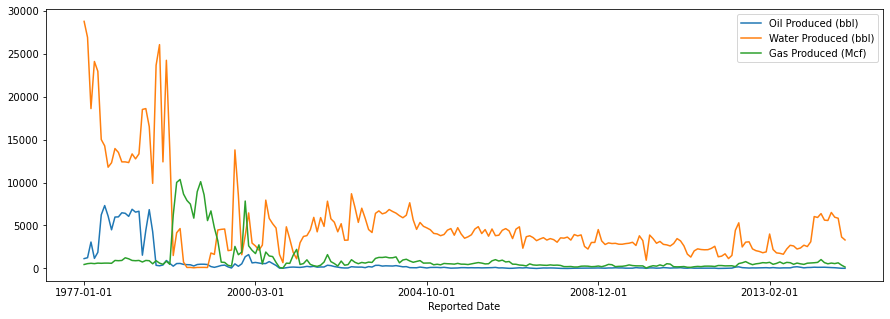

In [13]:
prosli[product_col].plot(figsize=(15,5))

In [19]:
API = 3700025

In [20]:
injsli = injection.loc[injection.groupby("API Number").groups[API]]
injsli.index = injsli["Reported Date"]
injsli = injsli.sort_index()

<AxesSubplot:xlabel='Reported Date'>

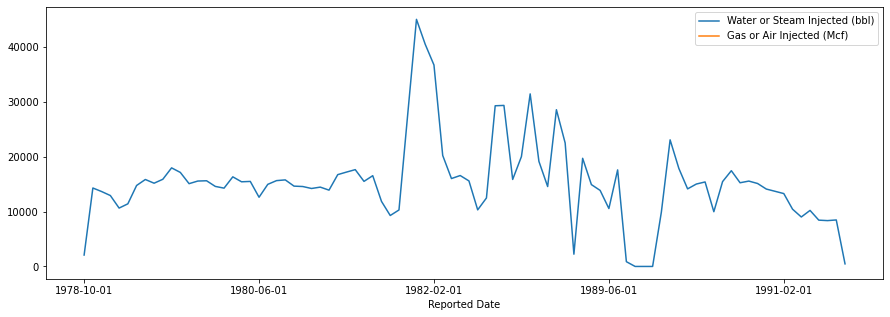

In [21]:
injsli[inject_col].plot(figsize=(15,5))

## Earthquake

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
evid = np.unique(eq_data["EVID"].tolist())

In [31]:
ind = [each for each in eq_data_raw.index if eq_data_raw.loc[each,"EVID"] in evid]
#.iloc[:,1:].drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)

KeyError: "None of [Int64Index([ 26185,  26201,  26213,  26271,  26285,  26290,  26298,  26336,\n             26337,  26391,\n            ...\n            717315, 717463, 717475, 717497, 717535, 717547, 717596, 717597,\n            717608, 717632],\n           dtype='int64', length=29234)] are in the [columns]"

In [33]:
eq_data_new = eq_data_raw.loc[ind]
eq_data_new

,#YYY/MM/DD,HH:mm:SS.ss,ET,GT,MAG,M,LAT,LON,DEPTH,Q,EVID,NPH,NGRM,Time,Year
26185,1977/01/01,01:00:31.80,eq,l,2.93,l,34.458,-117.960,4.3,A,3332247.0,45.0,85.0,1977-01-01 01:00:31.800,1977
26201,1977/01/03,05:14:07.23,eq,l,1.60,h,34.309,-118.556,12.0,A,3332265.0,15.0,23.0,1977-01-03 05:14:07.230,1977
26213,1977/01/04,18:53:31.93,eq,l,2.20,h,34.360,-118.663,22.6,A,3332283.0,17.0,26.0,1977-01-04 18:53:31.930,1977
26271,1977/01/10,23:12:46.53,eq,l,2.00,h,34.412,-118.460,20.4,B,3332345.0,16.0,23.0,1977-01-10 23:12:46.530,1977
26285,1977/01/12,01:16:00.37,eq,l,1.77,h,34.047,-118.946,6.0,C,10081834.0,4.0,0.0,1977-01-12 01:16:00.370,1977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717547,2018/12/29,17:25:22.41,eq,l,1.47,l,33.991,-118.211,13.3,A,38410088.0,43.0,1989.0,2018-12-29 17:25:22.410,2018
717596,2018/12/30,16:29:15.93,eq,l,2.30,l,34.165,-117.788,14.3,A,38410976.0,195.0,2913.0,2018-12-30 16:29:15.930,2018
717597,2018/12/30,16:30:46.61,eq,l,1.74,l,34.168,-117.788,14.4,A,38410992.0,123.0,2571.0,2018-12-30 16:30:46.610,2018
717608,2018/12/30,22:03:09.14,eq,l,0.87,l,34.164,-117.791,14.0,A,38411208.0,34.0,1590.0,2018-12-30 22:03:09.140,2018


<AxesSubplot:xlabel='Year', ylabel='MAG'>

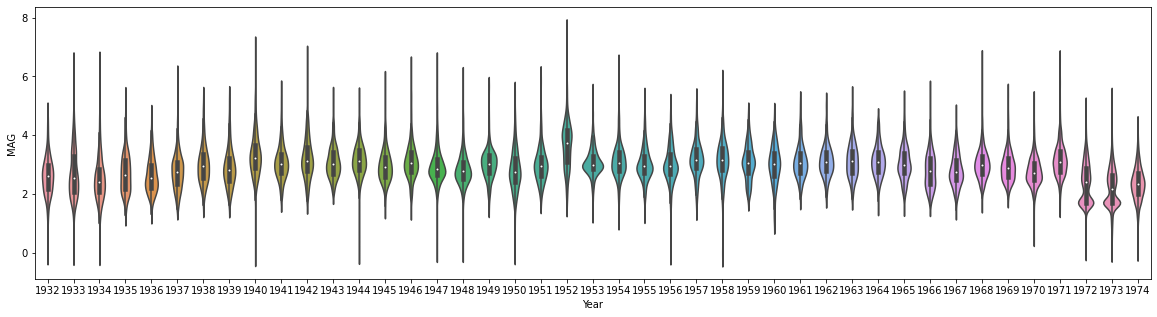

In [35]:
plt.figure(figsize = (20,5))
sns.violinplot(data = eq_data_raw[(eq_data_raw["Year"]<1975)], y = "MAG", x = "Year",figsize = (20,5))

<AxesSubplot:xlabel='Year', ylabel='MAG'>

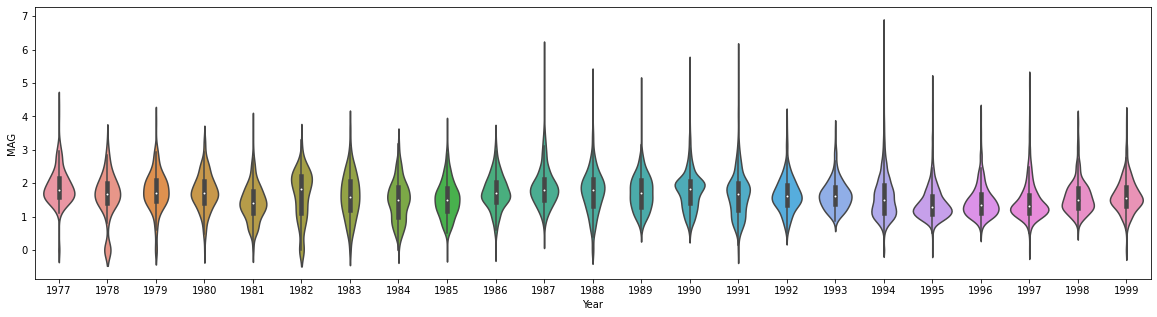

In [36]:
plt.figure(figsize = (20,5))
sns.violinplot(data = eq_data_new[(eq_data_new["Year"]<2000) & (eq_data_new["Year"]>=1975)], y = "MAG", x = "Year",figsize = (20,5))

<AxesSubplot:xlabel='Year', ylabel='MAG'>

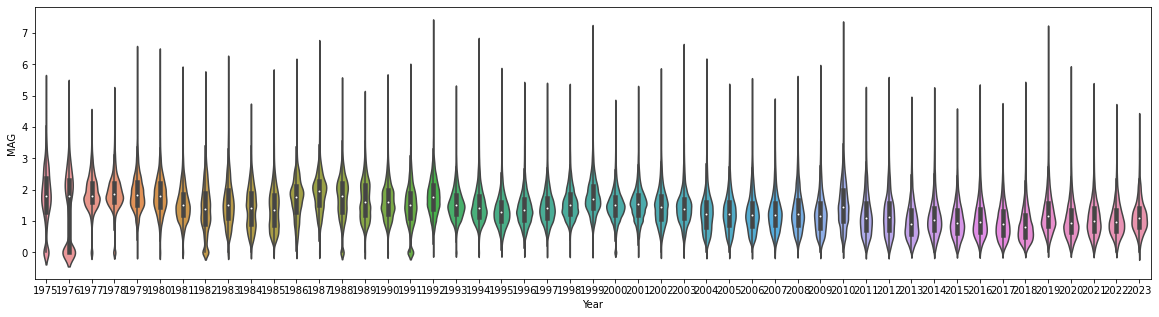

In [ ]:
plt.figure(figsize = (20,5))
sns.violinplot(data = eq_data[eq_data["Year"]>=1975], y = "MAG", x = "Year",figsize = (15,5))

## correlation analysis

In [20]:
import scipy.stats as stats

In [21]:
inject_col = ["Water or Steam Injected (bbl)","Gas or Air Injected (Mcf)"]
product_col = ["Oil Produced (bbl)","Water Produced (bbl)","Gas Produced (Mcf)"]

In [56]:
#water = pd.pivot_table(injection, index = "Reported Date", columns = "API Number",
#                       values = inject_col[0], aggfunc='sum').fillna(0)

In [22]:
water = pd.pivot_table(injection, index = "Reported Date", columns = "API Number",
                       values = inject_col[0], aggfunc='mean').fillna(0)

In [25]:
ts = pd.DataFrame()

In [75]:
water.columns

Int64Index([ 3700025,  3700033,  3700046,  3700089,  3700094,  3700134,
             3700136,  3700148,  3700153,  3700155,
            ...
            25921167, 25921168, 25921172, 25921182, 25921183, 25921373,
            25921735, 25921738, 25921757, 25921762],
           dtype='int64', name='API Number', length=4981)

In [23]:
inj_ind = list(set(API_ind) & set(water.columns))

In [26]:
ts[inject_col[0]] = water[inj_ind].sum(axis = 1)

In [27]:
ts

,Water or Steam Injected (bbl)
Reported Date,
1977-01-01,62111712.0
1977-02-01,55336645.0
1977-03-01,61473197.5
1977-04-01,57714109.5
1977-05-01,57672312.5
...,...
2017-10-01,75121591.0
2017-11-01,68505809.5
2017-12-01,71709788.0


In [28]:
gas = pd.pivot_table(injection, index = "Reported Date", columns = "API Number",
                       values = inject_col[1], aggfunc='mean').fillna(0)
inj_ind = list(set(API_ind) & set(gas.columns))
ts[inject_col[1]] = gas[inj_ind].sum(axis = 1)

In [29]:
for each in product_col:
    sli = pd.pivot_table(production, index = "Reported Date", columns = "API Number",
                            values = each, aggfunc='mean').fillna(0)
    ind = list(set(API_ind) & set(sli.columns))
    ts[each] = sli[ind].sum(axis = 1)

<AxesSubplot:xlabel='Reported Date'>

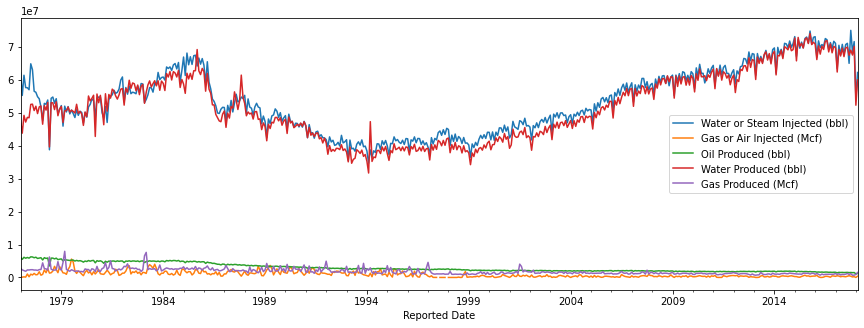

In [87]:
ts.plot(figsize=(15,5))

In [30]:
water_col = ["Water or Steam Injected (bbl)","Water Produced (bbl)",]
gas_col = ["Gas or Air Injected (Mcf)","Gas Produced (Mcf)"]
oil_col = ["Oil Produced (bbl)",]

<AxesSubplot:xlabel='Reported Date'>

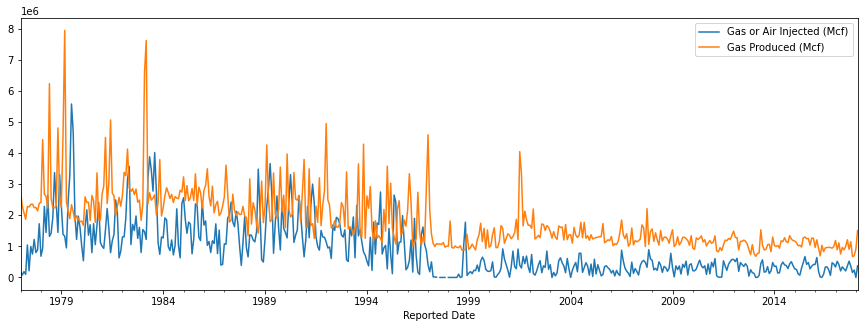

In [97]:
ts[gas_col].plot(figsize=(15,5))

Pandas computed Pearson r: 0.9795617014125543
Scipy computed Pearson r: 0.9795617014125555 and p-value: 0.0


[Text(0.5, 0, 'Frame'), Text(0, 0.5, 'Pearson r')]

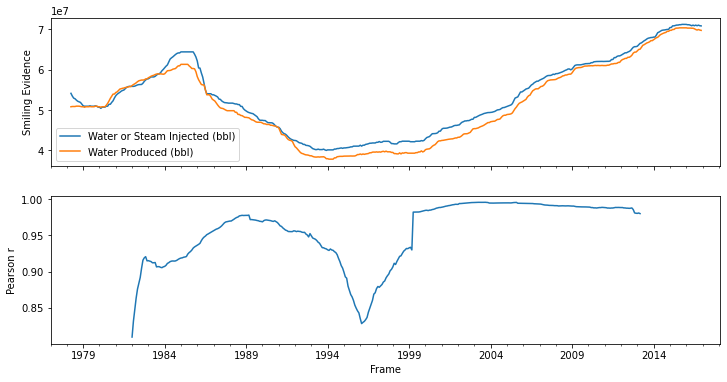

In [103]:
df = ts[water_col].copy()
overall_pearson_r = df.corr().iloc[0,1]
print(f"Pandas computed Pearson r: {overall_pearson_r}")
# 输出：使用 Pandas 计算皮尔逊相关结果的 r 值：0.2058774513561943

r, p = stats.pearsonr(df.dropna()[water_col[0]], df.dropna()[water_col[1]])
print(f"Scipy computed Pearson r: {r} and p-value: {p}")
# 输出：使用 Scipy 计算皮尔逊相关结果的 r 值：0.20587745135619354，以及 p-value：3.7902989479463397e-51

# 计算滑动窗口同步性
#f,ax=plt.subplots(figsize=(12,3))
#df.rolling(window=30,center=True).median().plot(ax=ax)
#ax.set(xlabel='Time',ylabel='Pearson r')
#ax.set(title=f"Overall Pearson r = {np.round(overall_pearson_r,2)}")
#plt.show()

# 设置窗口宽度，以计算滑动窗口同步性
r_window_size = 120
# 插入缺失值
df_interpolated = df.interpolate()
# 计算滑动窗口同步性
rolling_r = df_interpolated[water_col[0]].rolling(window=r_window_size, center=True).corr(df_interpolated[water_col[1]])
f,ax=plt.subplots(2,1,figsize=(12,6),sharex=True)
df.rolling(window=30,center=True).median().plot(ax=ax[0])
ax[0].set(xlabel='Frame',ylabel='Smiling Evidence')
rolling_r.plot(ax=ax[1])
ax[1].set(xlabel='Frame',ylabel='Pearson r')
#plt.suptitle("Smiling data and rolling window correlation")

Pandas computed Pearson r: 0.4135180981746752
Scipy computed Pearson r: 0.4135180981746746 and p-value: 9.597625119485935e-22


[Text(0.5, 0, 'Frame'), Text(0, 0.5, 'Pearson r')]

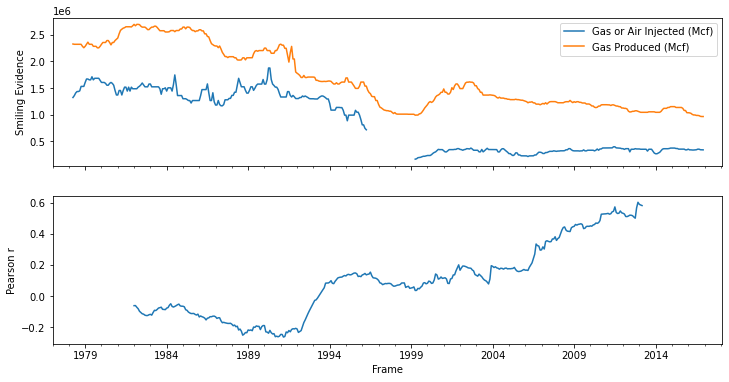

In [104]:
df = ts[gas_col].copy()
overall_pearson_r = df.corr().iloc[0,1]
print(f"Pandas computed Pearson r: {overall_pearson_r}")
# 输出：使用 Pandas 计算皮尔逊相关结果的 r 值：0.2058774513561943

r, p = stats.pearsonr(df.dropna()[gas_col[0]], df.dropna()[gas_col[1]])
print(f"Scipy computed Pearson r: {r} and p-value: {p}")
# 输出：使用 Scipy 计算皮尔逊相关结果的 r 值：0.20587745135619354，以及 p-value：3.7902989479463397e-51

# 设置窗口宽度，以计算滑动窗口同步性
r_window_size = 120
# 插入缺失值
df_interpolated = df.interpolate()
# 计算滑动窗口同步性
rolling_r = df_interpolated[gas_col[0]].rolling(window=r_window_size, center=True).corr(df_interpolated[gas_col[1]])
f,ax=plt.subplots(2,1,figsize=(12,6),sharex=True)
df.rolling(window=30,center=True).median().plot(ax=ax[0])
ax[0].set(xlabel='Frame',ylabel='Smiling Evidence')
rolling_r.plot(ax=ax[1])
ax[1].set(xlabel='Frame',ylabel='Pearson r')
#plt.suptitle("Smiling data and rolling window correlation")

In [37]:
import datetime

In [57]:
eq_slice = eq_data_new[eq_data_new["Year"]>1975].copy()
eq_slice.index = pd.to_datetime(eq_slice["Time"])

In [58]:
eq_slice["Month"] = [each.month for each in eq_slice.index]

In [59]:
eq_slice["Month"] = eq_slice["Month"].ffill().astype(np.int64)

<AxesSubplot:xlabel='Time'>

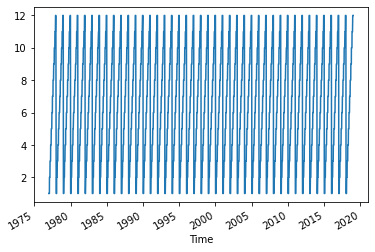

In [45]:
eq_slice["Month"].plot()

<AxesSubplot:xlabel='Time'>

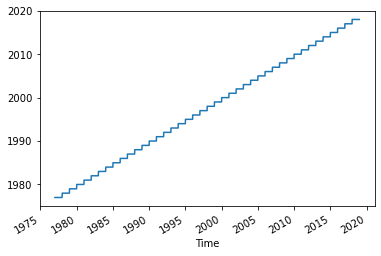

In [47]:
eq_slice["Year"].plot()

In [46]:
eq_slice["TimeMonth"] = [datetime.datetime(eq_slice.loc[each,"Year"], eq_slice.loc[each,"Month"], 1) for each in eq_slice.index]

TypeError: cannot convert the series to <class 'int'>

In [60]:
lis = []
for each in eq_slice.index:
    try:
        lis.append(datetime.datetime(each.year, each.month, 1))
    except:
        print(each)
        print(len(lis))
        lis.append(None)
    

In [52]:
eq_slice.loc[eq_slice.index.to_list()[1193],"Year"]

Time
1982-03-08 01:19:00    1982
1982-03-08 01:19:00    1982
Name: Year, dtype: int64

In [61]:
eq_slice["TimeMonth"] = lis

In [71]:
indexuniq = np.unique(eq_slice.index)

In [72]:
sli = eq_slice.loc[indexuniq].groupby(by=["TimeMonth"])["MAG"].mean()
#sli.index = timeind

<AxesSubplot:xlabel='TimeMonth'>

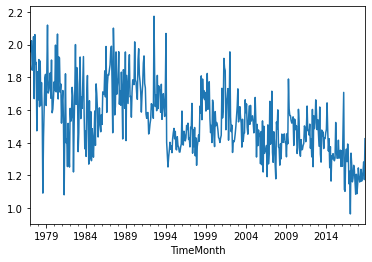

In [73]:
sli.plot()

<AxesSubplot:xlabel='TimeMonth'>

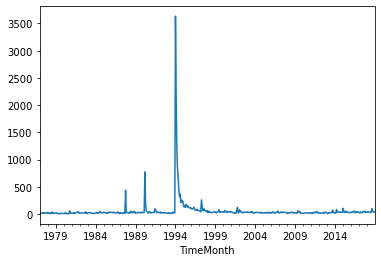

In [75]:
sli = eq_slice.groupby(by=["TimeMonth"])["MAG"].count()
sli.plot()

<AxesSubplot:xlabel='TimeMonth'>

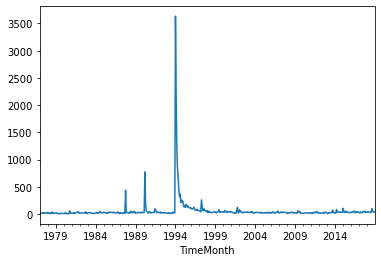

In [74]:
sli = eq_slice.loc[indexuniq].groupby(by=["TimeMonth"])["MAG"].count()
sli.plot()

是不是有同一时刻的地震被报道了很多次

GT列是什么

<AxesSubplot:>

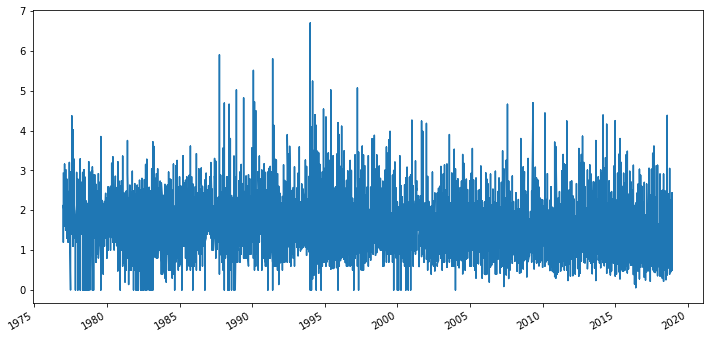

In [56]:
eq_slice["MAG"].plot(figsize=(12,6))

<AxesSubplot:>

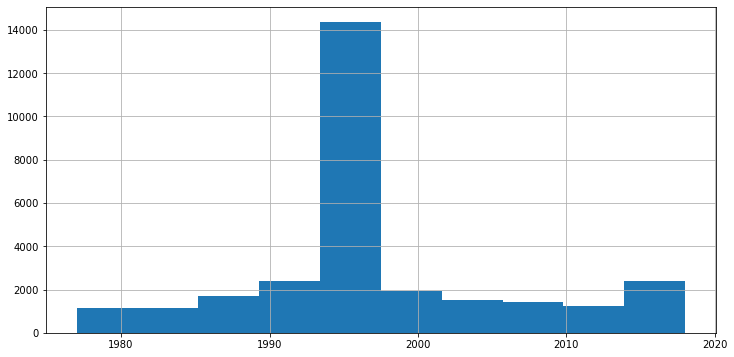

In [76]:
eq_slice["Year"].hist(figsize=(12,6))

<AxesSubplot:>

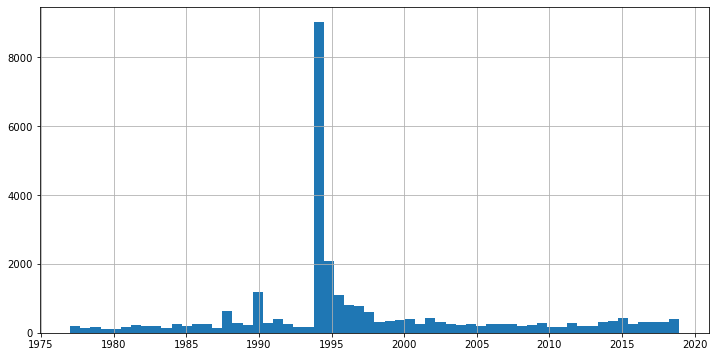

In [80]:
eq_slice["TimeMonth"].hist(figsize=(12,6),bins = 60)

<AxesSubplot:>

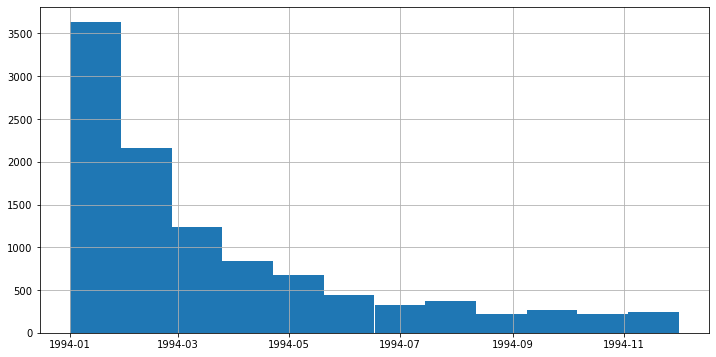

In [84]:
eq_slice[eq_slice["Year"]==1994]["TimeMonth"].hist(figsize=(12,6),bins = 12)

<AxesSubplot:xlabel='TimeMonth'>

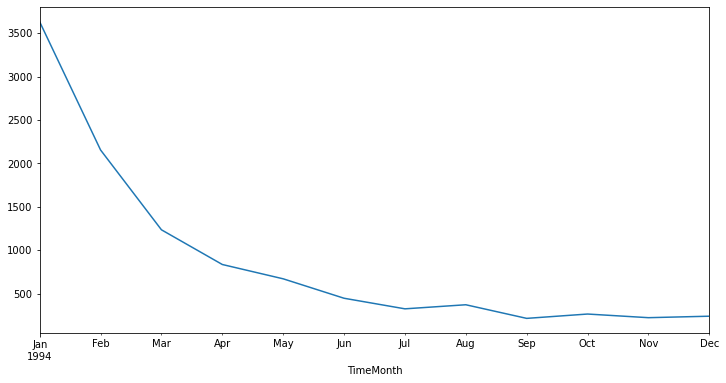

In [89]:
sli = eq_slice[eq_slice["Year"]==1994].groupby(by=["TimeMonth"])["MAG"].count()
sli.plot(figsize=(12,6))

1994年1月到底发生了什么，怎么有3500次地震